## Making Sentiment Analysis Better with NLTK & Scikit-Learn

So you might be asking, what exactly is "sentiment analysis"? 

Well, it's exactly what it sounds like: it's building a computational system to determine the emotional tone behind words. This is important because it allows you to gain an understanding of the attitudes, opinions, and emotions of the people in your data. At a higher level, sentiment analysis involves Natural language processing and artificial intelligence by taking the actual text element, transforming it into a format that a machine can read, and using statistics to determine the actual sentiment.

In this tutorial, we'll review some of the methods used to determine sentiment, but focus on the ways in which we can make sentiment analysis *better*. 


### Environment Setup

This guide was written in Python 3.6. If you haven't already, download Python and Pip. Next, you’ll need to install several packages that we’ll use throughout this tutorial:

``` 
pip3 install re
pip3 install nltk
pip3 install sklearn
```

Lastly, download the data we'll be working with in this example. You can find this in your folder as `negative_tweets` and `positive_tweets`.

Now you're all set to begin!

Sentiment Analysis isn't a new problem. There are thousands of labeled data out there, labels varying from simple positive and negative to more complex systems that determine *how* positive or negative is a given text. With that said, I've selected a pre-labeled set of data consisting of tweets from Twitter. Using this data, we'll begin by building a sentiment analysis model with scikit-learn. 

For those of you unfamiliar with scikit-learn, `scikit-learn` is a Python module with built-in implemented machine learning algorithms. In this tutorial, we'll specifically use the Logistic Regression model, which is a linear model commonly used for classifying binary data.

In [152]:
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.model_selection import train_test_split 
# if this doesn't work, try: from sklearn.cross_validation import train_test_split

# 1. Building Sentiment Classifier using Scikit-Learn package

### Preparing the Data

To implement our linear classifier, we need the twitter data in a format that allows us to feed it into the classifier. Using the `sklearn.feature_extraction.text.CountVectorizer`, we will convert the text documents to a matrix of token counts. As you'll see soon enough, these vector counts will be what the classifier will ultimately use to train. So first, we import all the needed modules: 

But before we even get to vectorizing, we haven't even read in our data! Each file is a text file where each line is a sentence, so we can use the built-in `open()` function to split the file into tweets and append them to lists. Note that text and labels have to be separated for the test phase of this example!

In [153]:
text_pos = []
labels_pos = []
with open("D:\\AIT580\\AIT580\\data\\textsample1.txt", encoding='utf-8') as f:
    for i in f: 
        text_pos.append(i) 
        labels_pos.append('pos')

text_neg = []
labels_neg = []
with open("D:\\AIT580\\AIT580\\data\\textsample2.txt", encoding='utf-8') as f:
    for i in f: 
        text_neg.append(i)
        labels_neg.append('neg')
print()

Now that the data is properly stored in Python lists, it's time to split this data into training and test data. For the purpose of this tutorial, we'll keep 80% for training and 20% for testing -- we do this with Python list slicing! 

In [154]:
training_text = text_pos[:int((.8)*len(text_pos))] + text_neg[:int((.8)*len(text_neg))]
training_labels = labels_pos[:int((.8)*len(labels_pos))] + labels_neg[:int((.8)*len(labels_neg))]

test_text = text_pos[int((.8)*len(text_pos)):] + text_neg[int((.8)*len(text_neg)):]
test_labels = labels_pos[int((.8)*len(labels_pos)):] + labels_neg[int((.8)*len(labels_neg)):]

Next, we initialize a vectoriser with the CountVectorizer class. Because we haven't pre-processed any of the data, we'll set lowercase to `False` and exclude stop word removal or stemming. 

In [155]:
vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    max_features = 85
)

Next, we use the `fit_transform()` method to transform our corpus data into feature vectors. Since the input needed is a list of strings, we concatenate all of our training and test data. 

In [156]:
features = vectorizer.fit_transform(
    training_text + test_text)

features_nd = features.toarray() # for easy use

As a final step, we'll split the training data to get an evaluation set through scikit-learn's built-in cross validation method. All we need to do is provide the data and assign a training percentage (in this case, 80%).

In [157]:
x_train, x_test, y_train, y_test  = train_test_split(
        features_nd[0:len(training_text)], 
        training_labels,
        train_size=0.80, 
        random_state=1234)

### Building Model - Linear Classifier

Finally, we can build the classifier for this corpus! As mentioned before, we'll be using the Logistic Regression from scikit-learn, so we'll start there: 

In [158]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

Once the model is initialized, we have to fit it to our specific dataset, so we use scikit-learn's `fit()` method to do so:

In [159]:
log_model = log_model.fit(x_train, y_train)

And finally, we use this classifier to label the evaluation set we created earlier:

In [160]:
test_pred = log_model.predict(x_test)

### Tesing Model Accuracy

Now just for our own "fun", let's take a look at some of the classifications our model makes! We'll choose a random set and then call our model on each! 

In [161]:
import random
spl = random.sample(range(len(test_pred)), 10)
for text, sentiment in zip(test_text, test_pred[spl]):
    print (sentiment, text)

pos 1	dudeee i LOVED brokeback mountain!!!!

pos 1	I either LOVE Brokeback Mountain or think it's great that homosexuality is becoming more acceptable!:

pos 1	Anyway, thats why I love " Brokeback Mountain.

pos 1	Brokeback mountain was beautiful...

pos 1	I love Brokeback Mountain.

pos 1	I love Brokeback Mountain....

pos 1	He's like,'YEAH I GOT ACNE AND I LOVE BROKEBACK MOUNTAIN '..

neg 1	Brokeback Mountain was so awesome.

pos 1	Brokeback Mountain was an AWESOME movie.

pos 1	man i loved brokeback mountain!



Just glancing over the examples above, it's pretty obvious there are some misclassifications. But obviously we want to do more than just 'eyeball' the data, so let's actually calculate the accuracy score. 

What's the point in creating a machine learning algorithm if you have no idea how it performs? This is why we left some of the dataset for testing purposes. In scikit-learn, there is a function called sklearn.metrics.accuracy_score which calculates the accuracy percentage. Using this, we see that this model has an accuracy of about 76%. 

In [162]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, test_pred))

0.9639084507042254


Yikes. 76% is better than randomly guessing, but still pretty low as far as classification accuracy goes. *Maybe* this is the best we can do with this dataset, but maybe we *can* do better? So let's give it a try with the Python module `nltk`. 

# 2. Building Sentiment Classifier using NLTK package

### Preparing the Data 

`nltk` is a much different from `scikit-learn`. `nltk` specializes and is *made for* natural language processing tasks, so needless to say, it was expected that `scikit-learn` wouldn't necessarily be the best choice. 
 
With that said, we'll now use `nltk` to build a sentiment analysis model on the same dataset. `nltk` requires a different data format, which is why I've implemented the function below:

In [163]:
import nltk
nltk.download('punkt')

def format_sentence(sent):
    return({word: True for word in nltk.word_tokenize(sent)})



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\malli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [164]:
print(format_sentence("The cat is very cute"))

{'The': True, 'cat': True, 'is': True, 'very': True, 'cute': True}


Here, `format_sentence` changes each tweet into a dictionary of words mapped to `True` booleans. Though not obvious from this function alone, this will eventually allow us to train our prediction model by splitting the text into its tokens, i.e. <i>tokenizing</i> the text. You'll learn about why this format is important in a later section.

Using the data on the github repo, we'll actually format the positively and negatively labeled data.

In [165]:
import io
pos = []
with io.open("D:\\AIT580\\AIT580\\data\\textsample1.txt", 'r', encoding='utf-8') as f:
    for i in f: 
        pos.append([format_sentence(i), 'pos'])


In [166]:
neg = []
with io.open("D:\\AIT580\\AIT580\\data\\textsample2.txt", 'rU', encoding='utf-8') as f:
    for i in f: 
        neg.append([format_sentence(i), 'neg'])

C:\Users\malli\AppData\Local\Temp/ipykernel_19852/3476510117.py:2: DeprecationWarning: 'U' mode is deprecated
  with io.open("D:\\AIT580\\AIT580\\data\\textsample2.txt", 'rU', encoding='utf-8') as f:


Next, we'll split the labeled data into the training and test data, just as we did before.

In [167]:
training = pos[:int((.8)*len(pos))] + neg[:int((.8)*len(neg))]
test = pos[int((.8)*len(pos)):] + neg[int((.8)*len(neg)):]

### Building a Classifier

All NLTK classifiers work with feature structures, which can be simple dictionaries mapping a feature name to a feature value. In this example, we use the Naive Bayes Classifier, which makes predictions based on the word frequencies associated with each label of positive or negative.

In [168]:
from nltk.classify import NaiveBayesClassifier

classifier = NaiveBayesClassifier.train(training)

Since the Naive Bayes Classifier is based entirely off of the frequencies associated with each label for a given word, we can call a function `show_most_informative_features()` to see which words are the highest indicators of a positive or negative label:

In [169]:
classifier.show_most_informative_features()

Most Informative Features
                  sucked = True              neg : pos    =    437.2 : 1.0
                       0 = None              pos : neg    =    381.2 : 1.0
                       1 = True              pos : neg    =    381.2 : 1.0
                 awesome = True              pos : neg    =    212.5 : 1.0
                 AWESOME = True              pos : neg    =    143.2 : 1.0
                     guy = True              neg : pos    =    140.0 : 1.0
                    hate = True              neg : pos    =    108.6 : 1.0
                    love = True              pos : neg    =     81.6 : 1.0
                  person = True              neg : pos    =     73.7 : 1.0
                  around = True              neg : pos    =     72.8 : 1.0


Notice that there are three columns. Column 1 is why we used `format_sentence()` to map each word to a `True` value. What it does is count the number of occurences of each word for both labels to compute the ratio between the two, which is what column 3 represents. Column 2 lets us know which label occurs more frequently (the label on the left is the label most associated with the corresponding word. 

### Classification

Just to see how our model works, let's try the classifier out with a positive example: 

In [170]:
example1 = "Twilio is an awesome company!"

print(classifier.classify(format_sentence(example1)))

pos


Now let's try out an example we'd expect a negative label: 

In [171]:
example2 = "I'm sad that Twilio doesn't have even more blog posts!"

print(classifier.classify(format_sentence(example2)))

neg


So what happens when we mix words of different sentiment labels? Let's take a look at this example:

In [172]:
example3 = "I have no headache!"

print(classifier.classify(format_sentence(example3)))

pos


And we've found a mislabel! Naive Bayes doesn't consider the relationship *between* words, which is why it wasn't able to catch the fact that "no" acted as a negator to the word `headache`. Instead, it read two negative indicators and classified it as such. 

Given that, we can probably expect a less than perfect accuracy rate.

### Accuracy

Just like `scikit-learn`, nltk has a built in method that computes the accuracy rate of our model:

In [173]:
from nltk.classify.util import accuracy
print(accuracy(classifier, test))

0.9950738916256158


And we have improved performance! Awesome. Now, 83% is fairly solid, but it could be better! If you look at the actual data, you'll see that the data is kind of messy - there are typos, abbreviations, grammatical errors of all sorts. So how do we handle that? Can we handle that? Stay tuned for more soon. 

# 3. Validating Classifier Output using Count and Visualization

In [174]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\malli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\malli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### In this case we are validating text_pos (positive data) from the above examples

In [175]:
textfile_1 = []
with open("D:\\AIT580\\AIT580\\data\\textsample1.txt", encoding='utf-8') as f:
    for i in f:
        textfile_1.append(i) 

sample_1 = nltk.word_tokenize(str(textfile_1))

textfile_2 = []
with open("D:\\AIT580\\AIT580\\data\\textsample2.txt", encoding='utf-8') as f:
    for i in f:
        textfile_2.append(i) 

sample_2 = nltk.word_tokenize(str(textfile_2))

### Preprocessing data to remove stop words

In [176]:
default_stopwords = stopwords.words('english')
default_stopwords.extend(['...','\'re','n\'t','\'the','\'this','\'it','n\'',
                         'it\\','\'1\\ti','\'0\\ti','\'0\\tda','.\\n','..\\n',
                         '1\\ti','\'1\\tthe'])

In [177]:
# Remove single-character tokens (mostly punctuation)
sample_1 = [word for word in sample_1 if len(word) > 2]

# Remove numbers
# words = [word for word in words if not word.isnumeric()]

# Lowercase all words (default_stopwords are lowercase too)
sample_1 = [word.lower() for word in sample_1]

# Stemming words seems to make matters worse, disabled
# stemmer = nltk.stem.snowball.SnowballStemmer('german')
# words = [stemmer.stem(word) for word in words]

# Remove stopwords
sample_1 = [word for word in sample_1 if word not in default_stopwords]

sample_2 = [word for word in sample_2 if len(word) > 2]
sample_2 = [word.lower() for word in sample_2]
sample_2 = [word for word in sample_2 if word not in default_stopwords]



### Display Frequency count for dataset

In [178]:
# frequency distribution for sample-1
print("frequency distribution for sample-1")
fdist_1 = nltk.FreqDist(sample_1)

# Output top 50 words

for word, frequency in fdist_1.most_common(10):
    print(u'{};{}'.format(word, frequency))

# frquency distribution for sample -2
print("frquency distribution for sample -2")
fdist_2 = nltk.FreqDist(sample_2)
for word, frequency in fdist_2.most_common(10):
    print(u'{};{}'.format(word, frequency))

frequency distribution for sample-1
love;1446
vinci;1000
awesome;992
harry;986
like;950
code;891
impossible;829
potter;818
mountain;803
mission;776
frquency distribution for sample -2
vinci;1003
code;980
potter;908
mountain;908
harry;894
brokeback;776
0\ti;595
hate;571
sucked;571
0\tda;430


### Visualizing the Frequency Count

In [179]:
import pip
pip.main(['install', '--user', 'wordcloud'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

If there's an error in the above code, it might be because the pip package is out of date. In that case, install "wordcloud" package using pip command on your commandline:
```pip3 install wordcloud```

In [180]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(frequencies=fdist_1)

(-0.5, 799.5, 399.5, -0.5)

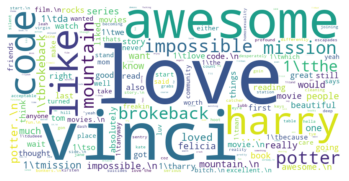

In [181]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Complete Your Assignment Questions Here

In [182]:
#1. For each datafile, run the NaiveBayes classifier from the Notebook and report the output whether
#each document as a whole (i.e., textsample1.txt and textsample2.txt) is classified as
#positive or negative.
positive=0
negative=0
with io.open("D:\\AIT580\\AIT580\\data\\textsample1.txt", 'r+', encoding='utf-8') as f:
    for i in f: 
        classify=classifier.classify(format_sentence(i))
        if classify=='neg':
            negative=negative+1
        elif classify=='pos':
            positive=positive+1
if negative>positive:
    print('negative')
else:
    print('positive')
    
positive=0
negative=0
with io.open("D:\\AIT580\\AIT580\\data\\textsample2.txt", 'r+', encoding='utf-8') as f:
    for i in f: 
        x=classifier.classify(format_sentence(i))
        if x=='neg':
            negative=negative+1
        elif x=='pos':
            positive=positive+1
if negative>positive:
    print('negative')
else:
    print('positive')



positive
negative


In [183]:
#2. Validate your answer by calculating the frequency of word count as well as visualizing it using
#wordcloud.

nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

textfile_1 = []
with open("D:\\AIT580\\AIT580\\data\\textsample1.txt", encoding='utf-8') as f:
    for i in f:
        textfile_1.append(i) 

sample_1 = nltk.word_tokenize(str(textfile_1))

textfile_2 = []
with open("D:\\AIT580\\AIT580\\data\\textsample2.txt", encoding='utf-8') as f:
    for i in f:
        textfile_2.append(i) 

sample_2 = nltk.word_tokenize(str(textfile_2))
default_stopwords = stopwords.words('english')
default_stopwords.extend(['...','\'re','n\'t','\'the','\'this','\'it','n\'',
                         'it\\','\'1\\ti','\'0\\ti','\'0\\tda','.\\n','..\\n',
                         '1\\ti','\'1\\tthe'])
# Remove single-character tokens (mostly punctuation)
sample_1 = [word for word in sample_1 if len(word) > 2]

# Remove numbers
# words = [word for word in words if not word.isnumeric()]

# Lowercase all words (default_stopwords are lowercase too)
sample_1 = [word.lower() for word in sample_1]

# Stemming words seems to make matters worse, disabled
# stemmer = nltk.stem.snowball.SnowballStemmer('german')
# words = [stemmer.stem(word) for word in words]

# Remove stopwords
sample_1 = [word for word in sample_1 if word not in default_stopwords]

sample_2 = [word for word in sample_2 if len(word) > 2]
sample_2 = [word.lower() for word in sample_2]
sample_2 = [word for word in sample_2 if word not in default_stopwords]
# frequency distribution for sample-1
print("frequency distribution for sample-1")
fdist_1 = nltk.FreqDist(sample_1)

# Output top 50 words

for word, frequency in fdist_1.most_common(10):
    print(u'{};{}'.format(word, frequency))

# frquency distribution for sample -2
print("frquency distribution for sample -2")
fdist_2 = nltk.FreqDist(sample_2)
for word, frequency in fdist_2.most_common(10):
    print(u'{};{}'.format(word, frequency))






[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\malli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\malli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


frequency distribution for sample-1
love;1446
vinci;1000
awesome;992
harry;986
like;950
code;891
impossible;829
potter;818
mountain;803
mission;776
frquency distribution for sample -2
vinci;1003
code;980
potter;908
mountain;908
harry;894
brokeback;776
0\ti;595
hate;571
sucked;571
0\tda;430


(-0.5, 799.5, 399.5, -0.5)

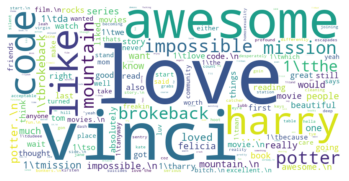

In [184]:
from wordcloud import WordCloud
wordcloud_2 = WordCloud(width=800, height=400, background_color='white')
wordcloud_2.generate_from_frequencies(frequencies=fdist_2)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#here we can observe the positive words like code vinci ,potter, mountain,harry etc 

(-0.5, 799.5, 399.5, -0.5)

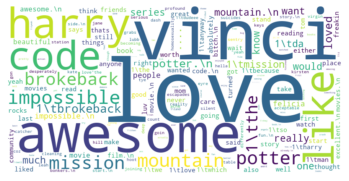

In [185]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(frequencies=fdist_1)
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# here we can observe the positive words like vinci,love ,harry ,awesome ,imposible etc

#3. Explain your analysis based on your results from question 1 and 2

* from sample-1 we observe love has the highest frequency of word count with 1446 repetitions while vinci has the highest frequency of word count 1003 .the accuracy intially was supposed to be 96 % but after churning the percentage of accuracy is 99% .from the sample one visualization we can observe the positive words like code ,vinci,potter,mountain,harry etc.from the sample two visualization we can observe the positive words like vinci,love,harry,awesome,impossible etc.and from naive bayes sentimental analysis we observe that the overal sample one data is positive whereas overall sample two data is negative as  whole



In [186]:
#4. Read “textsample1.txt” and report the sentiment of each line (i.e., each sentence) whether
#it is positive or negative. Show the Make an additional column in the data frame that shows the
#sentiment of each sentence. Then, save it as a “text1_sentiment.txt” file

        


In [187]:
import random
spl = random.sample(range(len(test_pred)), 1100)
with open("D:\\AIT580\\AIT580\\data\\text1_sentiment.txt",'w', encoding= 'utf-8') as f:
    for text, sentiment in zip(test_text, test_pred[spl]):
        value = sentiment+' '+text
        f.write(value)
print(value)

pos 0	Ok brokeback mountain is such a horrible movie.



In [189]:
#5. Split the data from textsample1.txt into two pieces (80% as the trainset and 20% as the
#testset, random sampling), and conduct the sentiment analysis model performance test. Report the
#prediction accuracy and discuss what the accuracy score means in a Markdown block below your
#scripts.
text_pos = []
labels_pos = []
with open("D:\\AIT580\\AIT580\\data\\textsample1.txt", encoding='utf-8') as f:
    for i in f: 
        text_pos.append(i) 
        labels_pos.append('pos')
 
training_text = text_pos[:int((.8)*len(text_pos))] 
training_labels = labels_pos[:int((.8)*len(labels_pos))]

test_text = text_pos[int((.8)*len(text_pos)):]
test_labels = labels_pos[int((.8)*len(labels_pos)):]

vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
    max_features = 85
)

features = vectorizer.fit_transform(
    training_text + test_text)

features_nd = features.toarray() 

x_train, x_test, y_train, y_test  = train_test_split(
        features_nd[0:len(training_text)], 
        training_labels,
        train_size=0.80, 
        random_state=1234)
from nltk.classify import NaiveBayesClassifier

classifier = NaiveBayesClassifier.train(training)
from nltk.classify.util import accuracy
print(accuracy(classifier, test))






0.9950738916256158


**from the results we observe that the accuracy is 99 percent which concludes that data of sample one has 99 percent of true values